In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff

In [348]:
largeDataSet = './data/raw/KDDTrain.arff'
smallDataSet = './data/raw/KDDTrain_20Percent.arff'

largeTestData = './data/raw/KDDTest.arff'
smallTestData = './data/raw/KDDTest-21.arff'

# Loading the .arff data format into a pandas dataframe
data, meta = arff.loadarff(smallDataSet)
test_data, test_meta = arff.loadarff(smallTestData)

df = pd.DataFrame(data)
df_test = pd.DataFrame(test_data)

# Review of the dataset
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,b'anomaly'


### Dataset Infomaion
- Dataset: NSL-KDD
- Source: https://www.kaggle.com/datasets/hassan06/nslkdd

- Description: The dataset is a modified version of the NSL-KDD dataset, which is a subset of the original KDD'99 dataset. The number of records in the NSL-KDD train and test sets are 125,973 and 22,544 respectively. These were created by applying the following two steps to the original dataset:
    - Duplicate free: The duplicate records were removed from the original KDD'99 dataset.
    - Binary: The multiclass attacks in the dataset were converted to binary by combining all the attack types into a single attack type, and the normal records remained unchanged.

In [349]:
# Calculating the number of features and samples and values types in the dataset
features = df.shape[1]
samples = df.shape[0]
value_types = ', '.join(df.dtypes.unique().astype(str))

# Print the information
print('Dataset Information: ')
print('--------------------')
print(f"Dataset has {features} features and {samples} samples.")
print(f"Dataset Value types: {value_types}")
print(f"Dataset has {df.isnull().sum().sum()} missing values.")
print("===========================================")

# Dataset summary
df.info()

Dataset Information: 
--------------------
Dataset has 42 features and 25192 samples.
Dataset Value types: float64, object
Dataset has 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  object 
 7   wrong_fragment               25192 non-null  float64
 8   urgent                       25192 non-null  float64
 9   hot                          25192 non-null  float64
 10  num_failed_logins            25192 no

### Data Cleaning : Handling & Imputing Missing Values

In this stage we're ensuring there's no missing / null values in the datset.

In [350]:
# Manually Checking if data include missing values
missingValues = df.isnull().sum()
print(f"Missing Values in every Column: \n{missingValues}")

Missing Values in every Column: 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [351]:
# Checking Anomolies in the dataset
print(f"Descriptive Statistics: \n{df.describe(include='all')}")


Descriptive Statistics: 
            duration protocol_type  service   flag     src_bytes  \
count   25192.000000         25192    25192  25192  2.519200e+04   
unique           NaN             3       66     11           NaN   
top              NaN        b'tcp'  b'http'  b'SF'           NaN   
freq             NaN         20526     8003  14973           NaN   
mean      305.054104           NaN      NaN    NaN  2.433063e+04   
std      2686.555640           NaN      NaN    NaN  2.410805e+06   
min         0.000000           NaN      NaN    NaN  0.000000e+00   
25%         0.000000           NaN      NaN    NaN  0.000000e+00   
50%         0.000000           NaN      NaN    NaN  4.400000e+01   
75%         0.000000           NaN      NaN    NaN  2.790000e+02   
max     42862.000000           NaN      NaN    NaN  3.817091e+08   

           dst_bytes   land  wrong_fragment       urgent           hot  ...  \
count   2.519200e+04  25192    25192.000000  25192.00000  25192.000000  ...   


Since there's no missing values in the dataset, we don't need to handle/ impute missing values.
Also, since every feature is complete with its values, we don't need to drop any feature.

## Outliers and Removing the Outliers
We'll find the outliers in the dataset and remove them if necessary.

/home/mahrjose/bin/BRACU/BRACU-CSE422/Course Project - Network Intrusion Detection using Machine Learning/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_22752/1249598667.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


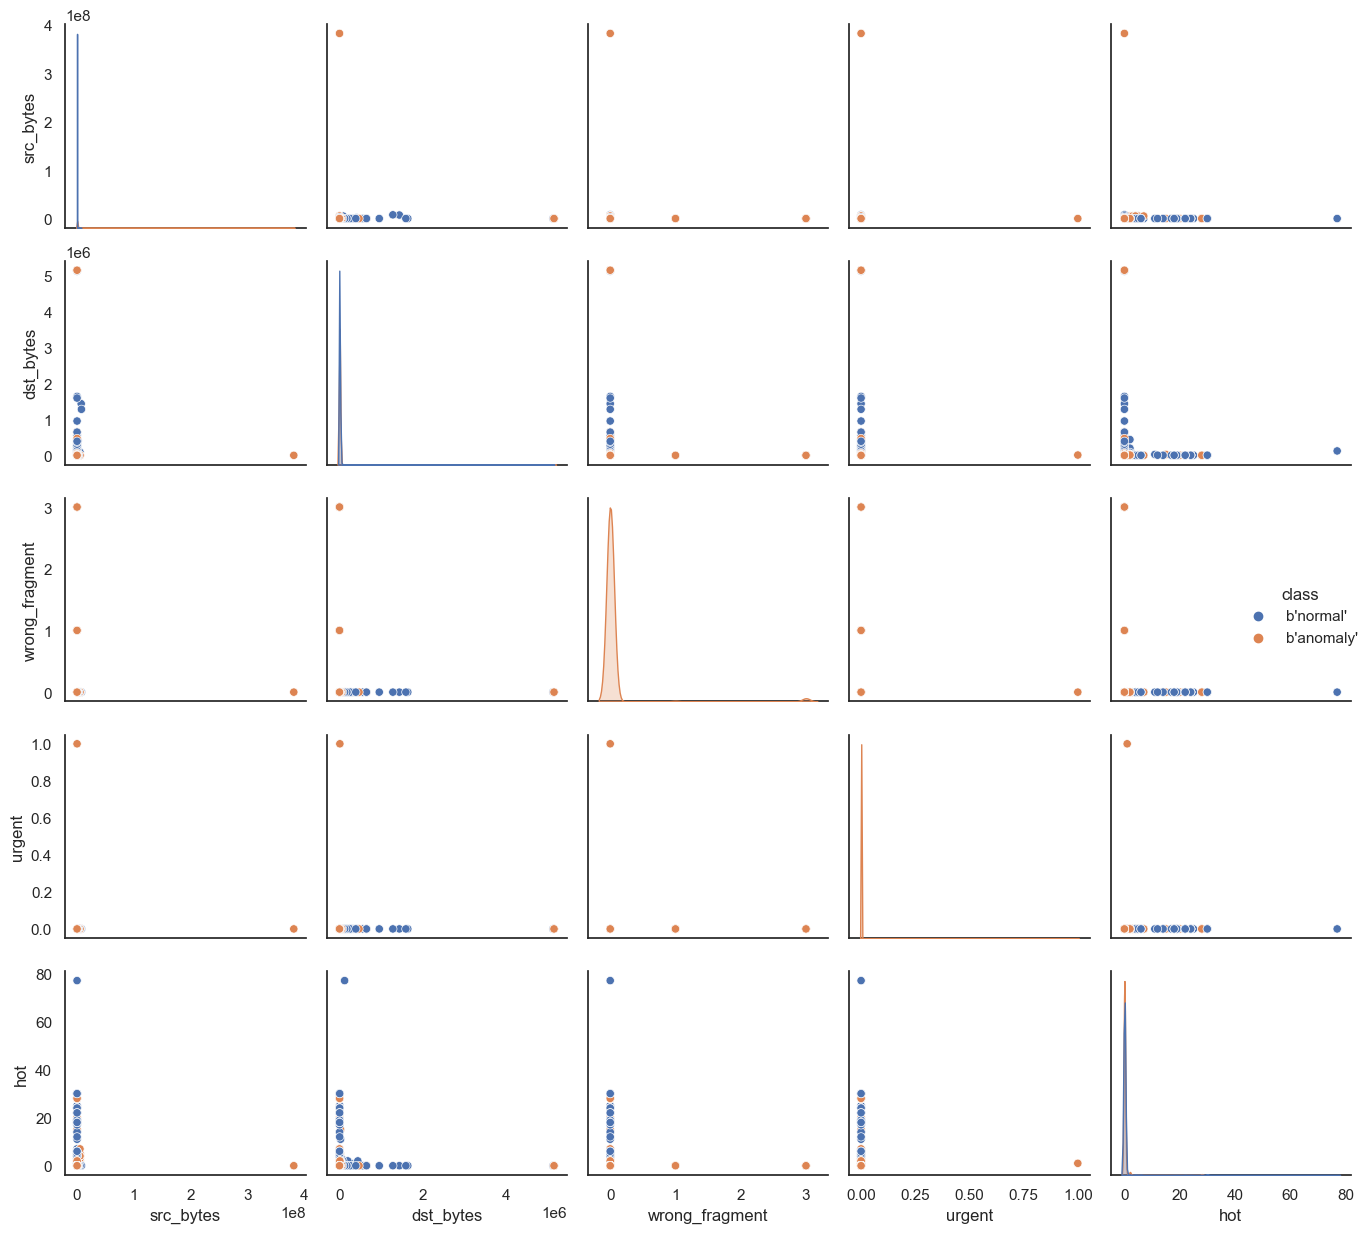

In [352]:
# Create a pair plot with 'hue' parameter for coloring based on the 'class' column
sns.pairplot(df[["protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "class"]], hue='class', diag_kind='kde')
plt.tight_layout()
plt.show()

Now, as there is outliers in our dataset, we will remove them. We will use the Z-score method to detect and remove the outliers. The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [353]:
from scipy.stats import zscore

# A threshold value beyod which a data point is considered as an outlier
zscore_threshold = 3

# Calculate Z-scores for numeric columns (excluding categorical)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
z_scores = np.abs(zscore(df[numeric_columns]))

# Create a outlier mask indicating whether each row is an outlier or not
outlier_mask = np.any(z_scores > zscore_threshold, axis=1)

# Remove outliers from the dataset
df_original = df.copy()
df = df_original[~outlier_mask]

# Display the shape before and after removing outliers
print("Dataset Shape before removing outliers:", df_original.shape)
print("Dataset Shape after removing outliers:", df.shape)


Dataset Shape before removing outliers: (25192, 42)
Dataset Shape after removing outliers: (20693, 42)


In [354]:
# Calculate Z-scores for numeric columns in the test data (excluding categorical)
numeric_columns_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
z_scores_test = np.abs(zscore(df_test[numeric_columns_test]))

# Create an outlier mask for the test data indicating whether each row is an outlier or not
outlier_mask_test = np.any(z_scores_test > zscore_threshold, axis=1)

# Remove outliers from the test dataset
df_test_original = df_test.copy()
df_test = df_test_original[~outlier_mask_test]

# Display the shape before and after removing outliers from the test dataset
print("Test Dataset Shape before removing outliers:", df_test_original.shape)
print("Test Dataset Shape after removing outliers:", df_test.shape)


Test Dataset Shape before removing outliers: (11850, 42)
Test Dataset Shape after removing outliers: (8337, 42)


### Feature Scaling

After removing the outliers, We'll now scale our datasets. We'll consider using both MinmaxScaler and StandardScaler to see which one performs better.

In [355]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate categorical and numeric columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()[:-1]  # Exclude the target
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encode categorical columns
encoded_columns = pd.get_dummies(df[categorical_columns], drop_first=True)

# Scale numeric columns using MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(df[numeric_columns])

# Scale numeric columns using StandardScaler
# scaler = StandardScaler()
# scaled_columns = scaler.fit_transform(df[numeric_columns])

# Convert the scaled numeric columns back to a DataFrame with appropriate column names
# Combine scaled numeric columns with the one-hot encoded categorical columns
# Note: Here, we're using the original index from the DataFrame 'df' to ensure alignment
scaled_df = pd.DataFrame(scaled_columns, columns=numeric_columns, index=df.index)
df_scaled = pd.concat([scaled_df, encoded_columns], axis=1)

df_not_scaled = df.copy()
df = df_scaled
df.head(3)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag_b'RSTOS0',flag_b'RSTR',flag_b'S0',flag_b'S1',flag_b'S2',flag_b'S3',flag_b'SF',flag_b'SH',logged_in_b'1',is_guest_login_b'1'
0,0.0,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1,0.0,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False


In [356]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate categorical and numeric columns
categorical_columns = df_test.select_dtypes(include=['object']).columns.tolist()[:-1]  # Exclude the target
numeric_columns = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encode categorical columns
encoded_columns = pd.get_dummies(df_test[categorical_columns], drop_first=True)

# Scale numeric columns using MinMaxScaler
scaler = MinMaxScaler()
scaled_columns = scaler.fit_transform(df_test[numeric_columns])

# Scale numeric columns using StandardScaler
# scaler = StandardScaler()
# scaled_columns = scaler.fit_transform(df_test[numeric_columns])

# Convert the scaled numeric columns back to a DataFrame with appropriate column names
# Combine scaled numeric columns with the one-hot encoded categorical columns
# Note: Here, we're using the original index from the DataFrame 'df' to ensure alignment
scaled_df_test = pd.DataFrame(scaled_columns, columns=numeric_columns, index=df_test.index)
df_test_scaled = pd.concat([scaled_df_test, encoded_columns], axis=1)

df_test_not_scaled = df_test.copy()
df_test = df_test_scaled
df_test.head(3)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag_b'RSTR',flag_b'S0',flag_b'S1',flag_b'S2',flag_b'S3',flag_b'SF',land_b'1',logged_in_b'1',is_host_login_b'1',is_guest_login_b'1'
0,0.00213,0.000093,0.039733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,True,False,False
1,0.00000,0.000035,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2,0.00000,0.000000,0.000721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


Correletion analysis -
feature seletion - 
hadling class imbalance -
dimentionality reduction


### Correletion Analysis
We'll use the Pearson Correlation method to find the correlation between the features. We'll remove the features which are highly correlated with each other. We'll try to keep the features which are highly correlated with the target variable.

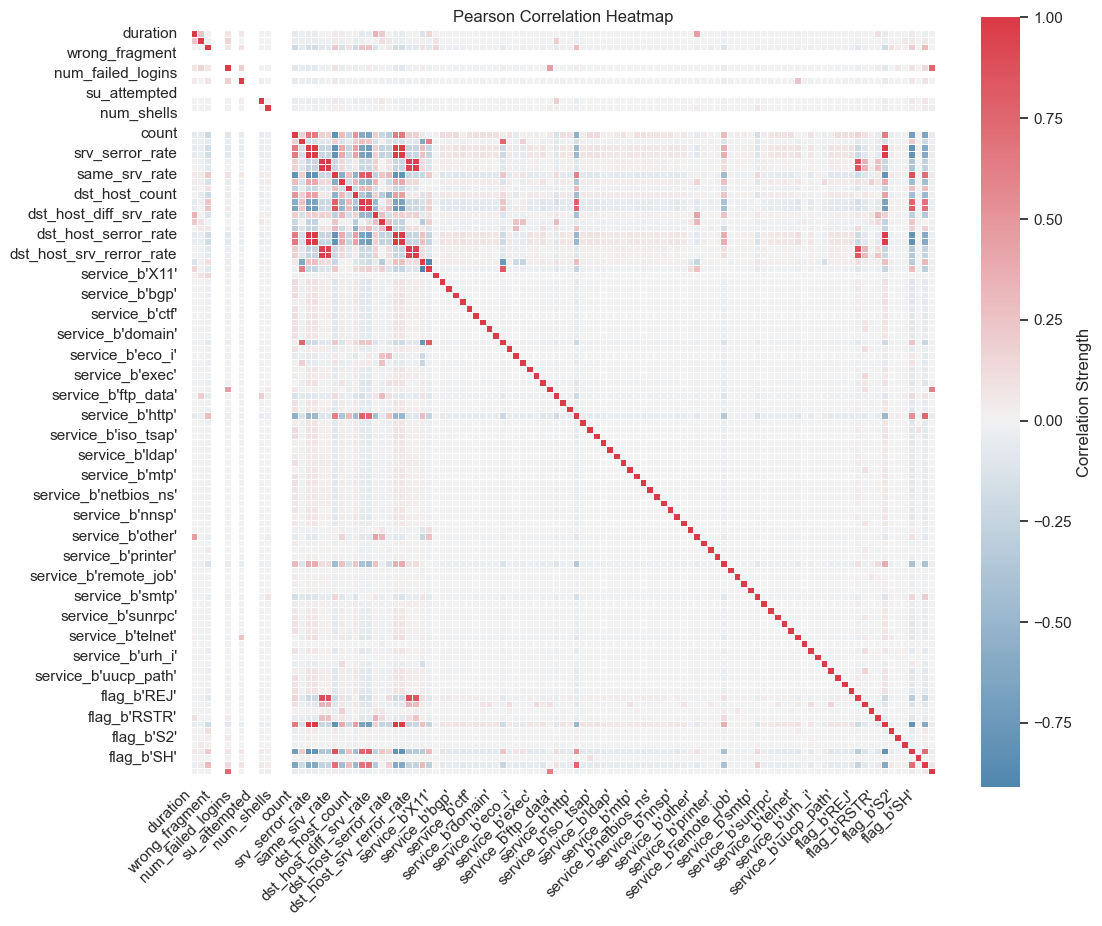

In [357]:
# Calculate Pearson correlation coefficients
correlation_matrix = df.corr(method='pearson')

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.set(style="white")
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap without annotations
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, fmt=".2f", square=True, center=0, linewidths=0.5)

# Set x-axis and y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, verticalalignment='center')

# Show colorbar with correlation scale
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Strength')

plt.title("Pearson Correlation Heatmap")
plt.show()

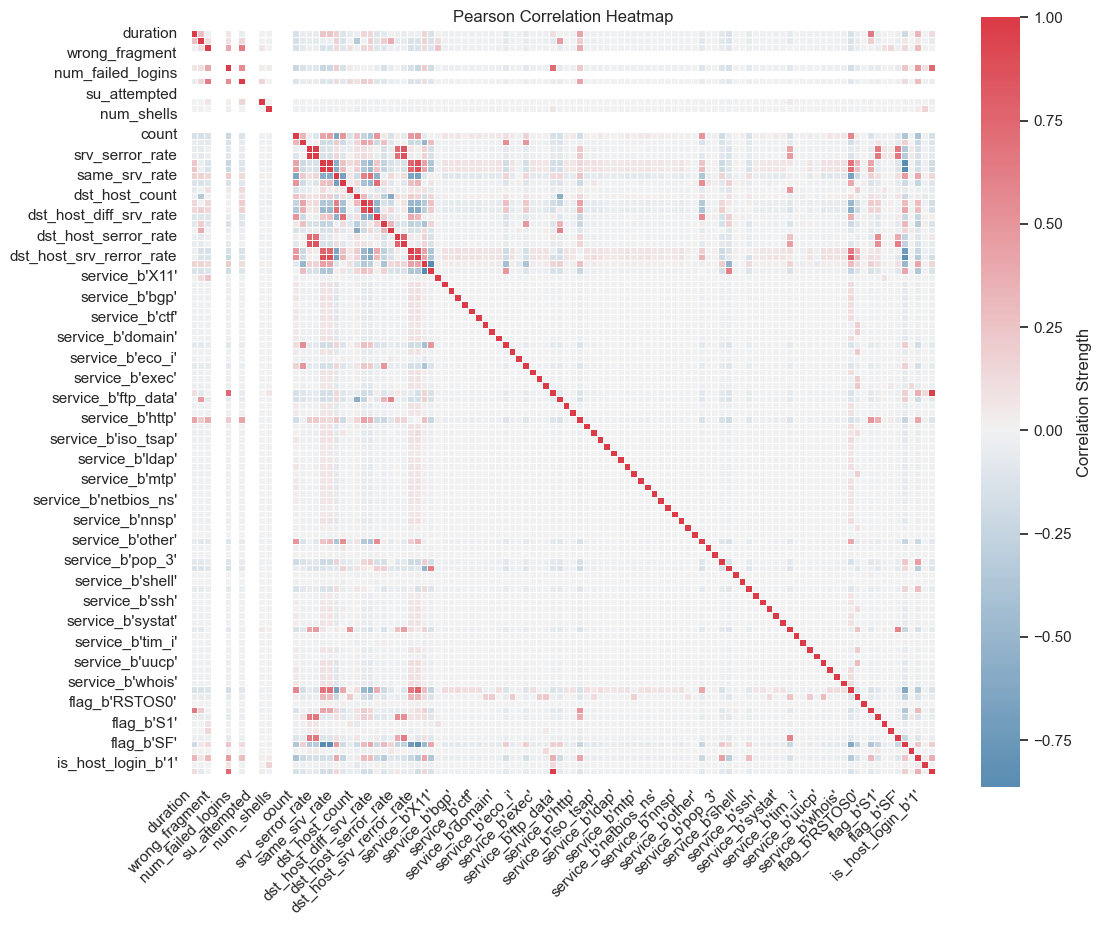

In [358]:
# Calculate Pearson correlation coefficients
correlation_matrix = df_test.corr(method='pearson')

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.set(style="white")
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap without annotations
ax = sns.heatmap(correlation_matrix, cmap=cmap, annot=False, fmt=".2f", square=True, center=0, linewidths=0.5)

# Set x-axis and y-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, verticalalignment='center')

# Show colorbar with correlation scale
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Strength')

plt.title("Pearson Correlation Heatmap")
plt.show()

Now, We'll remove some features that are not useful for our model. We'll remove the following features:

In [359]:
# Remove

In [360]:
# Remove From test

### Feature Reduction
We'll use PCA to reduce the dimensionality of our dataset. We'll use the elbow method to determine the number of components to use.

In [361]:
from sklearn.decomposition import PCA

# Since our current dataframe doesn't include our target class we don't need to drop it
# X = df.drop("target_column_name", axis=1)
unprocessed = df

# Initializing PCA with the number features to keep
feature_to_keep = 75
pca = PCA(n_components=feature_to_keep)

# Fitting PCA on data
preprocessed = pca.fit_transform(unprocessed)

print(f'Original shape: {unprocessed.shape}\nafter PCA: {preprocessed.shape}')

Original shape: (20693, 111)
after PCA: (20693, 75)


In [362]:

# Since our current dataframe doesn't include our target class we don't need to drop it
# X = df.drop("target_column_name", axis=1)
unprocessed_test = df_test

# Initializing PCA with the number features to keep
feature_to_keep_test = 75
pca_test = PCA(n_components=feature_to_keep)

# Fitting PCA on data
preprocessed_test = pca_test.fit_transform(unprocessed_test)

print(f'Original Test shape: {unprocessed_test.shape}\nafter PCA: {preprocessed_test.shape}')

Original Test shape: (8337, 110)
after PCA: (8337, 75)


### Data Splitting
Now, we will split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [363]:
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets
target = df_not_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(preprocessed, target, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (16554, 75)
X_test shape: (4139, 75)
y_train shape: (16554,)
y_test shape: (4139,)


## Training the Model

### Naive Bayes Classifier
We'll start by training a Naive Bayes Classifier.

In [364]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Binary Encoding the class variable for Naive-Bayes
# then splitting the data into trainning and testing sets
df_not_scaled['class'] = df_not_scaled['class'].apply(lambda x: 0 if x == b'normal' else 1)

target = df_not_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(preprocessed, target, test_size=0.2, random_state=42)


# Initialize the Naive Bayes model and trainning the model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Testing the model and calculating the accuracy of the model
# and calculating the confusing matrix
y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=["normal", "attack"])

print("================= Naive-Bayes Classifier =================\n")

print(f"Accuracy of Naive Bayes Classifier: {accuracy*100:.2f}%\n")
print(f"Confusion Matrix:")
print(conf_matrix)
print()
print("Classification Report:")
print(report)


================= Naive-Bayes Classifier =================

Accuracy of Naive Bayes Classifier: 76.64%

Confusion Matrix:
[[2107  157]
 [ 810 1065]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.72      0.93      0.81      2264
      attack       0.87      0.57      0.69      1875

    accuracy                           0.77      4139
   macro avg       0.80      0.75      0.75      4139
weighted avg       0.79      0.77      0.76      4139



In [365]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Binary Encoding the class variable for Naive-Bayes
df_test_not_scaled['class'] = df_test_not_scaled['class'].apply(lambda x: 0 if x == b'normal' else 1)

# Splitting the data into training and testing sets for testing
target_test = df_test_not_scaled['class']
X_test_final = preprocessed_test
y_test_final = target_test

# Initialize the Naive Bayes model and train it on the training data
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Testing the model on the preprocessed test data and calculating the accuracy
y_pred_test = naive_bayes_model.predict(X_test_final)
accuracy_test = accuracy_score(y_test_final, y_pred_test)

# Calculating the confusion matrix, precision, recall, and F1-score
conf_matrix_test = confusion_matrix(y_test_final, y_pred_test)
report_test = classification_report(y_test_final, y_pred_test, target_names=["normal", "attack"])

print("================= Naive-Bayes Classifier - Test Data =================\n")
print(f"Accuracy of Naive Bayes Classifier on Test Data: {accuracy_test*100:.2f}%\n")
print(f"Confusion Matrix on Test Data:")
print(conf_matrix_test)
print()
print("Classification Report on Test Data:")
print(report_test)


================= Naive-Bayes Classifier - Test Data =================

Accuracy of Naive Bayes Classifier on Test Data: 45.52%

Confusion Matrix on Test Data:
[[1104  456]
 [4086 2691]]

Classification Report on Test Data:
              precision    recall  f1-score   support

      normal       0.21      0.71      0.33      1560
      attack       0.86      0.40      0.54      6777

    accuracy                           0.46      8337
   macro avg       0.53      0.55      0.43      8337
weighted avg       0.73      0.46      0.50      8337



In [366]:

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Testing the model and calculating the accuracy of the model
# and calculating the confusion matrix
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=["normal", "attack"])

print("================= K-Nearest Neighbors (KNN) Classifier =================\n")

print(f"Accuracy of KNN Classifier: {accuracy*100:.2f}%\n")
print(f"Confusion Matrix:")
print(conf_matrix)
print()
print("Classification Report:")
print(report)


================= K-Nearest Neighbors (KNN) Classifier =================

Accuracy of KNN Classifier: 99.32%

Confusion Matrix:
[[2250   14]
 [  14 1861]]

Classification Report:
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      2264
      attack       0.99      0.99      0.99      1875

    accuracy                           0.99      4139
   macro avg       0.99      0.99      0.99      4139
weighted avg       0.99      0.99      0.99      4139



In [367]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the KNN model and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Testing the KNN model on the preprocessed test data and calculating the accuracy
y_pred_test = knn_model.predict(X_test_final)
accuracy_test = accuracy_score(y_test_final, y_pred_test)

# Calculating the confusion matrix, precision, recall, and F1-score
conf_matrix_test = confusion_matrix(y_test_final, y_pred_test)
report_test = classification_report(y_test_final, y_pred_test, target_names=["normal", "attack"])

print("================= K-Nearest Neighbors (KNN) Classifier - Test Data =================\n")
print(f"Accuracy of KNN Classifier on Test Data: {accuracy_test*100:.2f}%\n")
print(f"Confusion Matrix on Test Data:")
print(conf_matrix_test)
print()
print("Classification Report on Test Data:")
print(report_test)


================= K-Nearest Neighbors (KNN) Classifier - Test Data =================

Accuracy of KNN Classifier on Test Data: 52.61%

Confusion Matrix on Test Data:
[[1130  430]
 [3521 3256]]

Classification Report on Test Data:
              precision    recall  f1-score   support

      normal       0.24      0.72      0.36      1560
      attack       0.88      0.48      0.62      6777

    accuracy                           0.53      8337
   macro avg       0.56      0.60      0.49      8337
weighted avg       0.76      0.53      0.57      8337

